In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts

In [2]:
plt.rc('axes', axisbelow=True)

In [3]:
base = pd.read_csv('../input/laptop-prices/laptops.csv', encoding='latin-1')

In [4]:
base

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


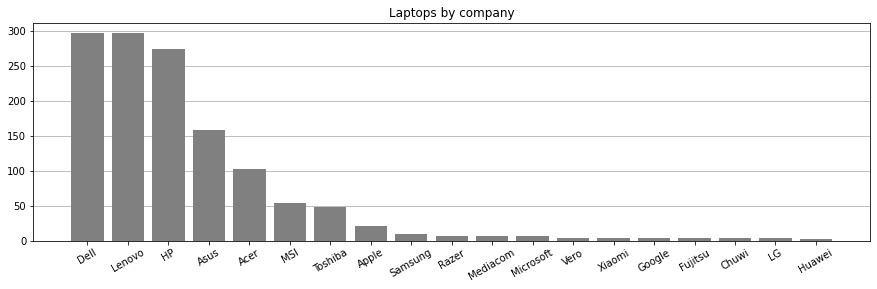

In [5]:
comp = base.groupby(['Company']).count().reset_index().sort_values(by='Unnamed: 0', ascending=False)
plt.figure(figsize=(15,4))
plt.bar(comp['Company'], comp['Unnamed: 0'], color='gray')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.title('Laptops by company')
plt.show()

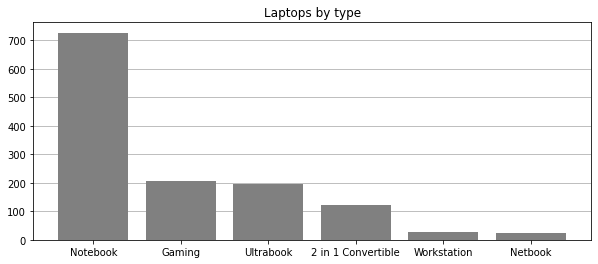

In [6]:
tn = base.groupby(['TypeName']).count().reset_index().sort_values(by='Unnamed: 0', ascending=False)
plt.figure(figsize=(10,4))
plt.bar(tn['TypeName'], tn['Unnamed: 0'], color='gray')
plt.title('Laptops by type')
plt.grid(axis='y')
plt.show()

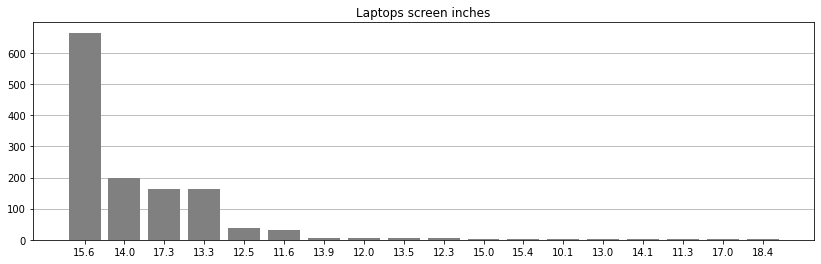

In [7]:
base['Inches'] = base['Inches'].astype(str)
inc = base.groupby(['Inches']).count().reset_index().sort_values(by='Unnamed: 0', ascending=False)
plt.figure(figsize=(14,4))
plt.bar(inc['Inches'], inc['Unnamed: 0'], color='gray')
plt.title('Laptops screen inches')
plt.grid(axis='y')
plt.show()

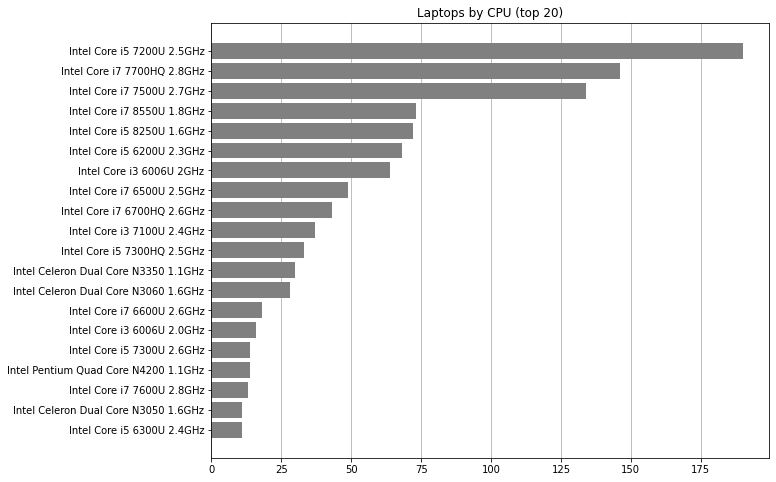

In [8]:
cpu = base.groupby(['Cpu']).count().reset_index().sort_values(by='Unnamed: 0', ascending=True).tail(20)
plt.figure(figsize=(10,8))
plt.barh(cpu['Cpu'], cpu['Unnamed: 0'], color='gray')
plt.title('Laptops by CPU (top 20)')
plt.grid(axis='x')
plt.show()

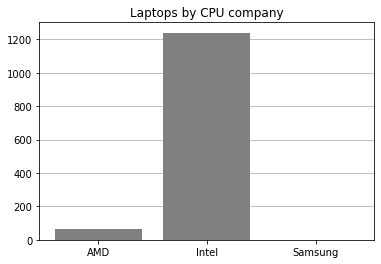

In [9]:
base['cputype'] = base['Cpu'].apply(lambda x: x.split(' ')[0])
cput = base.groupby(['cputype']).count().reset_index()
plt.bar(cput['cputype'], cput['Unnamed: 0'], color='gray')
plt.grid(axis='y')
plt.title('Laptops by CPU company')
plt.show()

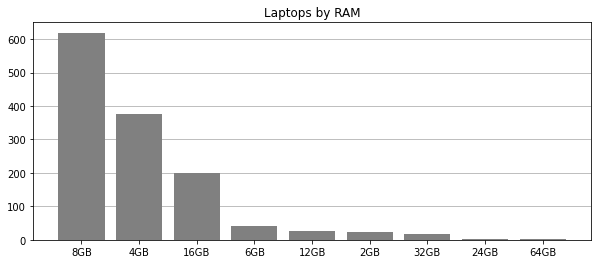

In [10]:
ram = base.groupby(['Ram']).count().reset_index().sort_values(by='Unnamed: 0', ascending=False)
plt.figure(figsize=(10,4))
plt.bar(ram['Ram'], ram['Unnamed: 0'], color='gray')
plt.title('Laptops by RAM')
plt.grid(axis='y')
plt.show()

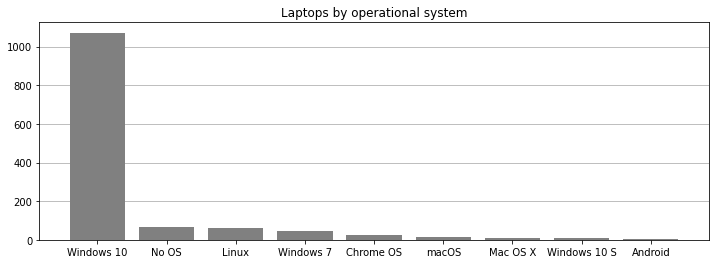

In [11]:
os = base.groupby(['OpSys']).count().reset_index().sort_values(by='Unnamed: 0', ascending=False)
plt.figure(figsize=(12,4))
plt.bar(os['OpSys'], os['Unnamed: 0'], color='gray')
plt.title('Laptops by operational system')
plt.grid(axis='y')
plt.show()

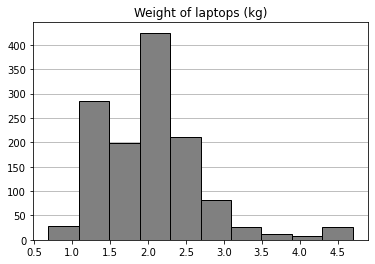

In [12]:
base['WeightNum'] = base['Weight'].apply(lambda x: x.split('kg')[0])
base['WeightNum'] = pd.to_numeric(base['WeightNum'])
plt.hist(base['WeightNum'], color='gray', edgecolor='k')
plt.title('Weight of laptops (kg)')
plt.grid(axis='y')
plt.show()

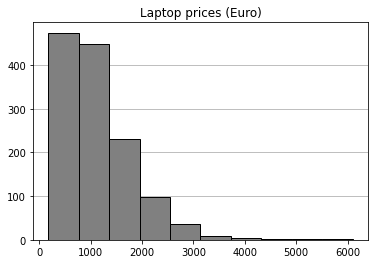

In [13]:
plt.hist(base['Price_euros'], color='gray', edgecolor='k')
plt.title('Laptop prices (Euro)')
plt.grid(axis='y')
plt.show()

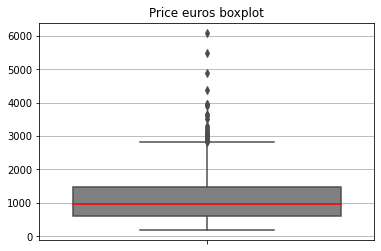

In [14]:
sns.boxplot(y=base['Price_euros'], color='gray', medianprops=dict(color="red"))
plt.ylabel(None)
plt.title('Price euros boxplot')
plt.grid(axis='y')
plt.show()

In [15]:
d = {}
for name in comp['Company']:
    d[name] = base.loc[base['Company'] == name]

for name, df in d.items():
    print(d[name]['Company'].unique(),
          '\n', d[name].describe())

['Dell'] 
         Unnamed: 0  Price_euros   WeightNum
count   297.000000   297.000000  297.000000
mean    650.599327  1186.068990    2.147040
std     375.415703   672.941227    0.693744
min      14.000000   274.900000    1.180000
25%     345.000000   735.070000    1.650000
50%     639.000000   985.000000    2.180000
75%     965.000000  1472.200000    2.300000
max    1313.000000  3659.400000    4.420000
['Lenovo'] 
         Unnamed: 0  Price_euros  WeightNum
count   297.000000   297.000000  297.00000
mean    682.471380  1086.384444    2.00229
std     358.541377   698.426088    0.60085
min      19.000000   229.000000    0.69000
25%     392.000000   549.000000    1.50000
50%     650.000000   899.000000    2.10000
75%     968.000000  1488.990000    2.30000
max    1318.000000  4899.000000    4.60000
['HP'] 
         Unnamed: 0  Price_euros   WeightNum
count   274.000000   274.000000  274.000000
mean    703.722628  1067.774854    1.911314
std     393.723118   617.508031    0.518931
min     